# Imports

In [10]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import Workflow

# Models

In [2]:
# Defining the models we are going to compare
dict_models = {
    'Logistic Regression': {
    'model': LogisticRegression(),
    'param_grid': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'intercept_scaling': [1, 10, 100]
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 150, 200],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20],
            'bootstrap': [True, False]
        }
    },
    'MLPClassifier': {
        'model': MLPClassifier(),
        'param_grid': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Layer configurations
            'activation': ['relu', 'tanh', 'logistic'],  # Activation functions
            'solver': ['adam', 'sgd'],  # Optimization solvers
            'alpha': [0.0001, 0.001, 0.01],  # L2 regularization term
            'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule
            'max_iter': [200, 300, 500]  # Maximum iterations
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}


# Kidney Dataset

In [11]:
dataK, targetK = Workflow.preprocessing("C:/Users/midou/OneDrive/Bureau/ML/Project/Data/kidney_disease.csv")

c:\Users\midou\Downloads\Workflow.py:76: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dm'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
c:\Users\midou\Downloads\Workflow.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

#######BEFORE SCALING AND NORMALIZING########
              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  381.000000  383.000000  313.000000  312.000000  348.000000  
mean    57.425722    3.072454  137.528754    4.627244   12.526437  
std     50.503006   

Processing categorical features: 100%|██████████| 14/14 [00:00<00:00, 879.84it/s]


Processing column: rbc
Possible categories and their frequencies:
rbc
normal      0.810484
abnormal    0.189516
Name: proportion, dtype: float64

Processing column: pc
Possible categories and their frequencies:
pc
normal      0.773134
abnormal    0.226866
Name: proportion, dtype: float64

Processing column: pcc
Possible categories and their frequencies:
pcc
notpresent    0.893939
present       0.106061
Name: proportion, dtype: float64

Processing column: ba
Possible categories and their frequencies:
ba
notpresent    0.944444
present       0.055556
Name: proportion, dtype: float64

Processing column: pcv
Possible categories and their frequencies:
pcv
41    0.063830
52    0.063830
44    0.057751
48    0.057751
40    0.048632
43    0.045593
42    0.039514
45    0.039514
32    0.036474
50    0.036474
36    0.036474
33    0.036474
28    0.036474
34    0.033435
37    0.033435
30    0.027356
29    0.027356
35    0.027356
46    0.027356
31    0.024316
24    0.021277
39    0.021277
26    0.018

C:\Users\midou\AppData\Local\Temp\ipykernel_21068\2120780846.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, palette="pastel")


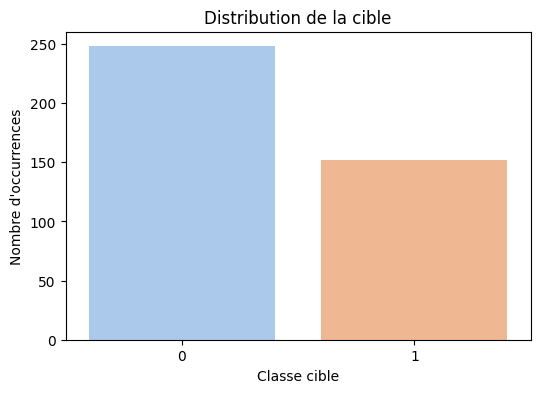

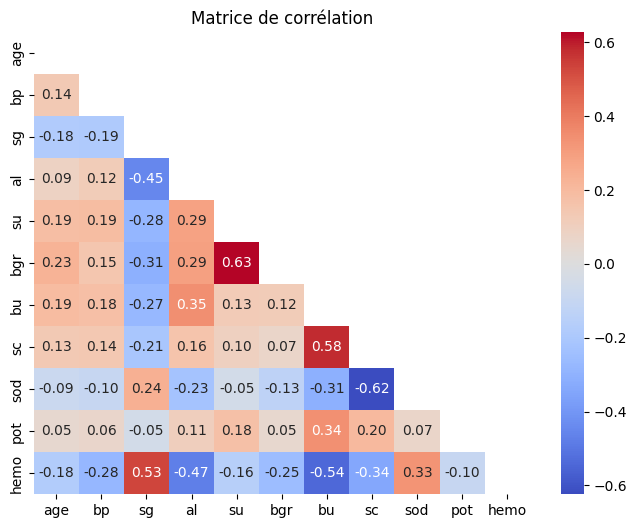

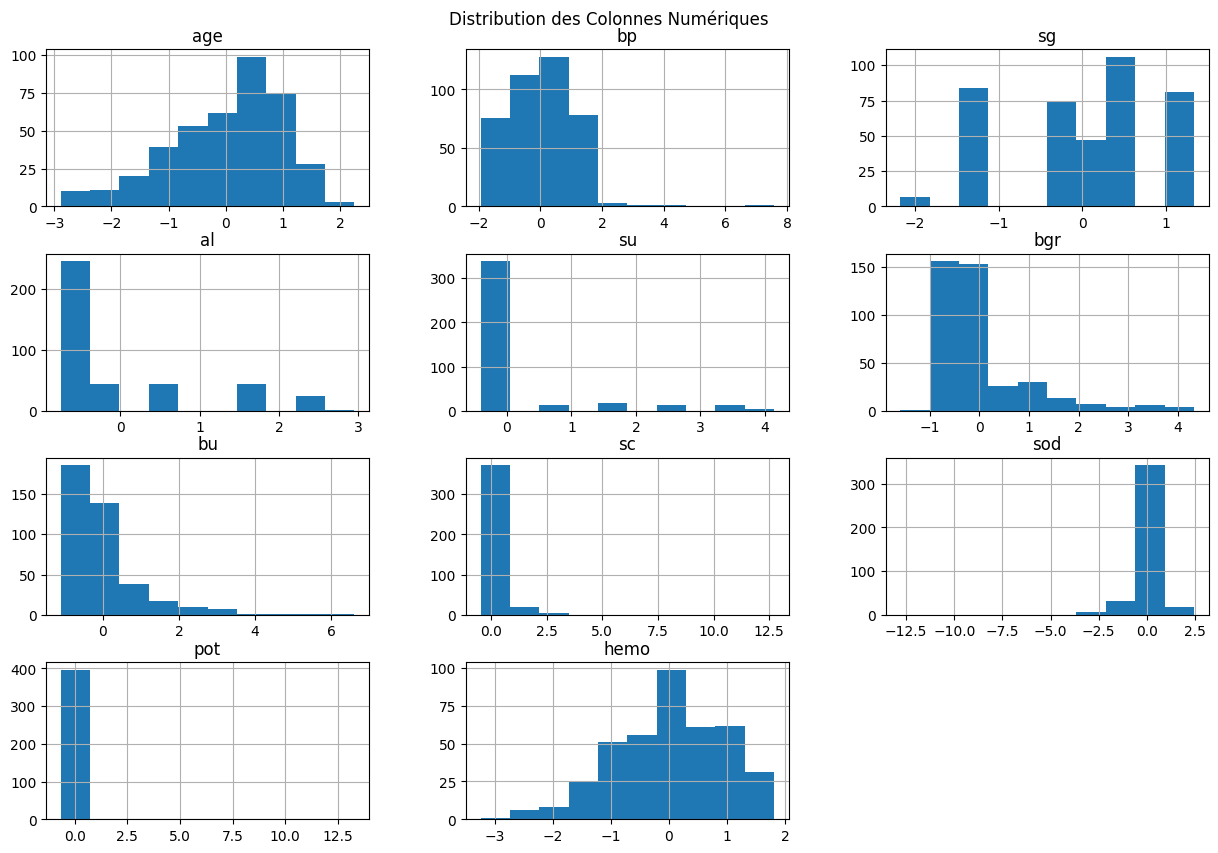

In [25]:
visualize_data(dataK, targetK)

In [57]:
X_train, X_test, y_train, y_test = Workflow.split_data(dataK, targetK)

In [58]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
best_reg = Workflow.train_and_tune_model(X_train, y_train, dict_models['Logistic Regression']['model'], dict_models['Logistic Regression']['param_grid'],  cv, scoring='f1', verbose=1, return_full_search=False)

Starting Grid Search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Grid Search Complete!

Best Parameters Found:
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1}
Best f1 Score: 0.9865


C:\Users\midou\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
best_Knn = Workflow.train_and_tune_model(X_train, y_train, dict_models['KNeighborsClassifier']['model'], dict_models['KNeighborsClassifier']['param_grid'],  cv, scoring='f1', verbose=1, return_full_search=False)

Starting Grid Search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Grid Search Complete!

Best Parameters Found:
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best f1 Score: 0.6634


In [8]:
best_rf = Workflow.train_and_tune_model(X_train, y_train, dict_models['RandomForestClassifier']['model'], dict_models['RandomForestClassifier']['param_grid'],  cv, scoring='f1', verbose=1, return_full_search=False)

Starting Grid Search...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Grid Search Complete!

Best Parameters Found:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}
Best f1 Score: 0.9909


In [15]:
best_nn  = Workflow.train_and_tune_model(X_train, y_train, dict_models['MLPClassifier']['model'], dict_models['MLPClassifier']['param_grid'],  cv, scoring='f1', verbose=1, return_full_search=False)

Starting Grid Search...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Grid Search Complete!

Best Parameters Found:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Best f1 Score: 0.7986


In [10]:
best_tree = Workflow.train_and_tune_model(X_train, y_train, dict_models['DecisionTreeClassifier']['model'], dict_models['DecisionTreeClassifier']['param_grid'],  cv, scoring='f1', verbose=1, return_full_search=False)

Starting Grid Search...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Grid Search Complete!

Best Parameters Found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best f1 Score: 0.9909


Évaluation des modèles:   0%|          | 0/5 [00:00<?, ?it/s]

Starting Grid Search...
Grid Search Complete!

Best Parameters Found:
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1}
Best f1 Score: 0.9865


C:\Users\midou\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


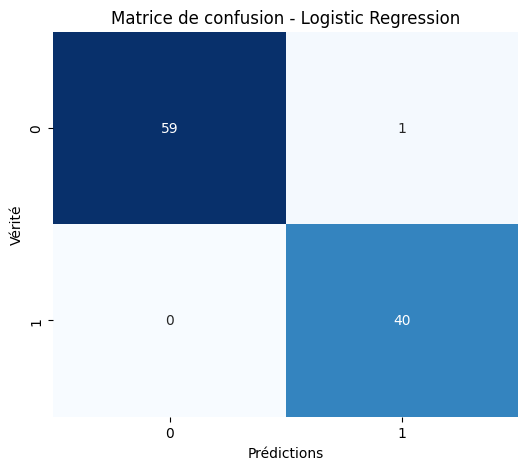

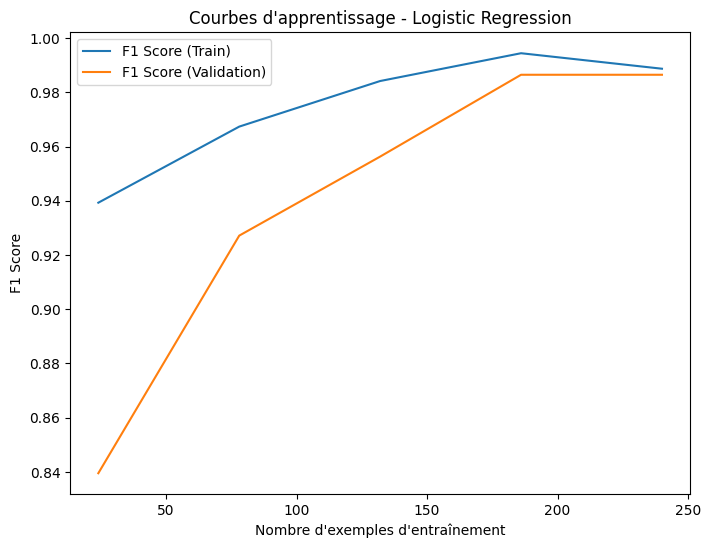

Évaluation des modèles:  20%|██        | 1/5 [00:00<00:03,  1.09it/s]

Starting Grid Search...
Grid Search Complete!

Best Parameters Found:
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best f1 Score: 0.6634


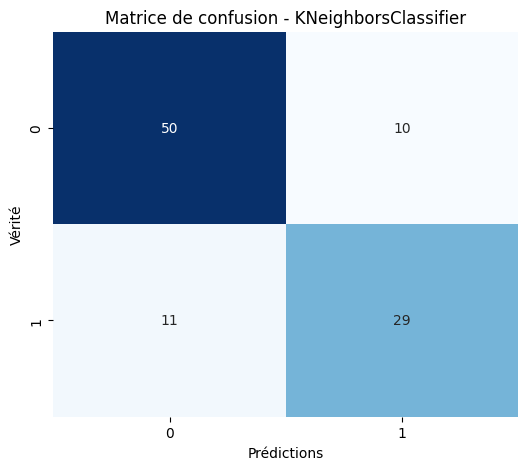

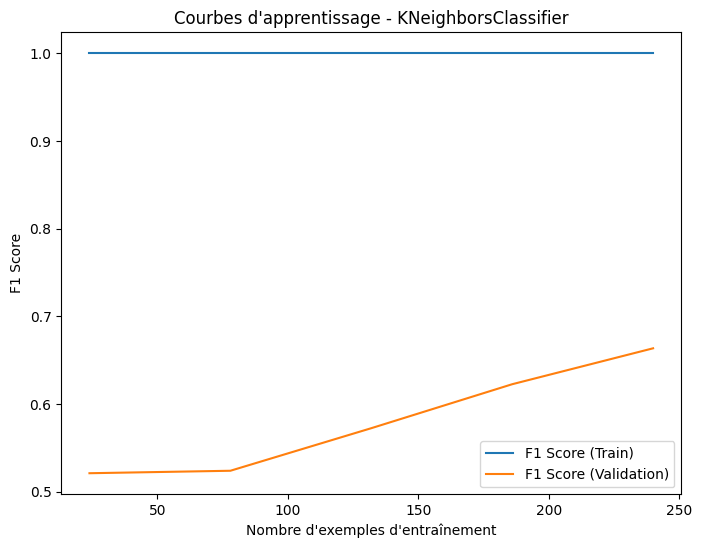

Évaluation des modèles:  40%|████      | 2/5 [00:01<00:02,  1.41it/s]

Starting Grid Search...
Grid Search Complete!

Best Parameters Found:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}
Best f1 Score: 0.9909


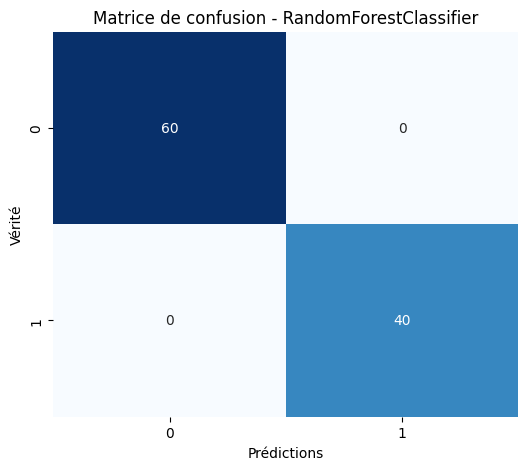

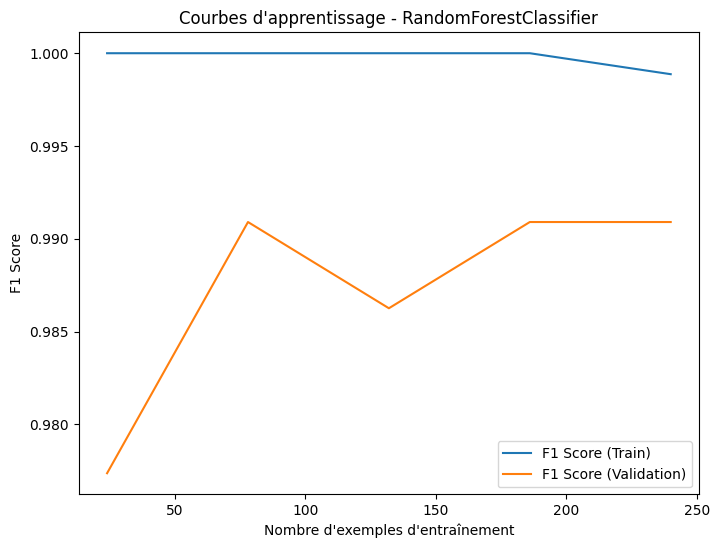

Évaluation des modèles:  60%|██████    | 3/5 [00:07<00:06,  3.32s/it]

Starting Grid Search...
Grid Search Complete!

Best Parameters Found:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'adam'}
Best f1 Score: 0.7651


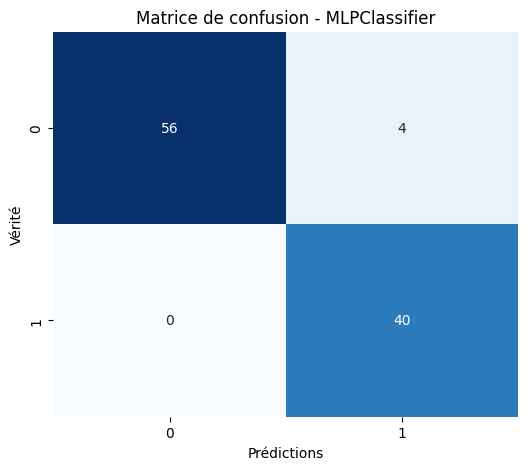

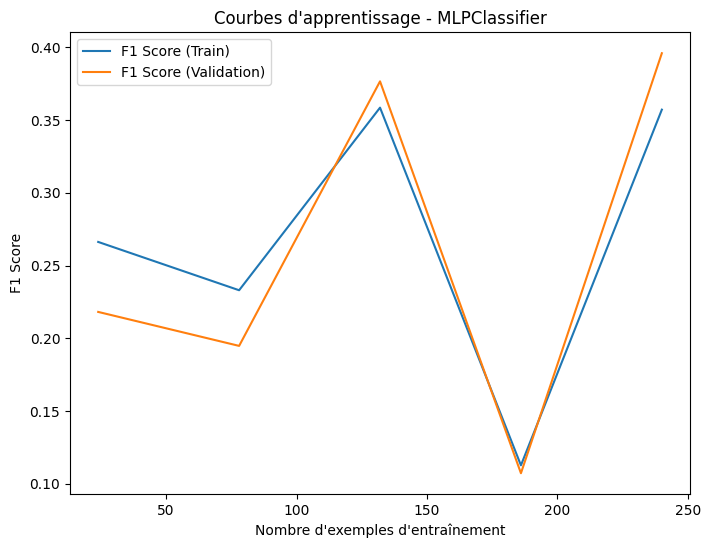

Évaluation des modèles:  80%|████████  | 4/5 [01:00<00:22, 22.58s/it]

Starting Grid Search...
Grid Search Complete!

Best Parameters Found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best f1 Score: 0.9909


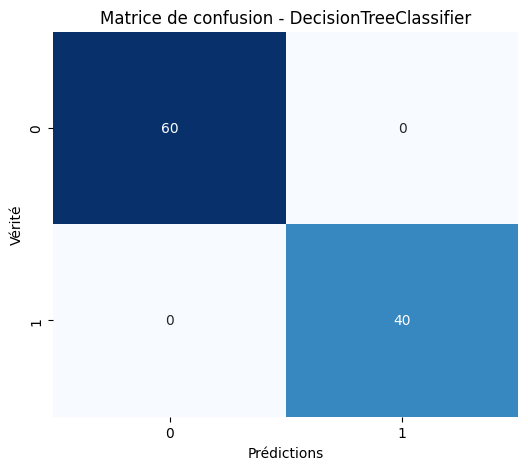

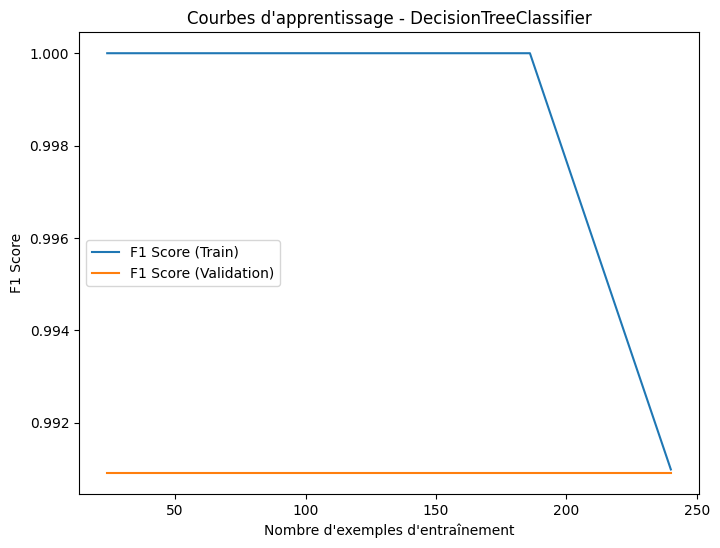

Évaluation des modèles: 100%|██████████| 5/5 [01:00<00:00, 12.14s/it]


In [23]:
Workflow.display_results(dict_models, X_train, y_train, X_test, y_test, cv, disp_col="F1 Score")

In [16]:
best_models = {
    'Logistic Regression': {
    'model': best_reg,
    },
    'KNeighborsClassifier': {
        'model': best_Knn
    },
    'RandomForestClassifier': {
        'model': best_rf
    },
    'MLPClassifier': {
        'model': best_nn
    },
    'DecisionTreeClassifier': {
        'model': best_tree
    }
}

In [18]:
results = []
for model_name, model in best_models.items():
    f1 = Workflow.test_model(X_test, y_test, model['model'])
    results.append({
        'model': model_name,
        'f1': f1
    })

In [21]:
print(results)

[{'model': 'Logistic Regression', 'f1': 0.9876543209876543}, {'model': 'KNeighborsClassifier', 'f1': 0.7341772151898734}, {'model': 'RandomForestClassifier', 'f1': 1.0}, {'model': 'MLPClassifier', 'f1': 0.8791208791208791}, {'model': 'DecisionTreeClassifier', 'f1': 1.0}]


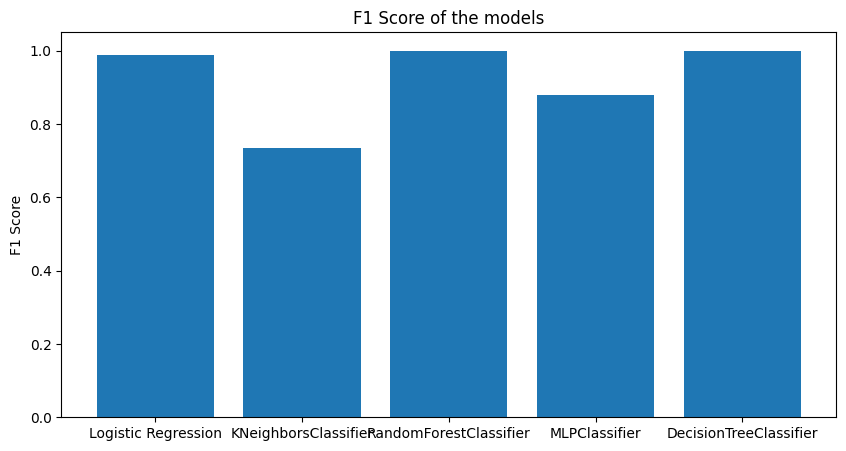

In [20]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar([x['model'] for x in results], [x['f1'] for x in results])
plt.ylabel('F1 Score')
plt.title('F1 Score of the models')
plt.show()

Commentary on the outputs:

When working with large and more complex data, we can see that the KN neighbhors classifier doesn't seem to be more suited. While, the others perform well for this data.

# Banknote Dataset

In [15]:
dataB, targetB = Workflow.preprocessing("C:/Users/midou/OneDrive/Bureau/ML/Project/Data/data_banknote_authentication.csv")

#######BEFORE SCALING AND NORMALIZING########
                 0            1            2            3            4
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
#######AFTER SCALING AND NORMALIZING########
                  0             1             2             3             4
count  1.372000e+03  1.372000e+03  1.372000e+03  1.372000e+03  1.372000e+03
mean   2.485864e-16 -2.071553e-16 -8.286213e-17  4.479734e-16 -8.286213e-17
std    1.000365e+00  1.000365e+00  1.00036

C:\Users\midou\AppData\Local\Temp\ipykernel_21068\2120780846.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, palette="pastel")


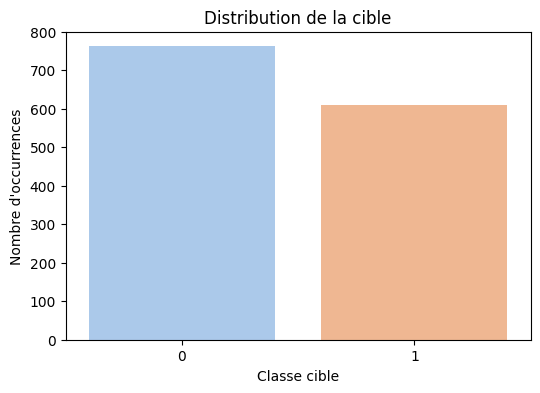

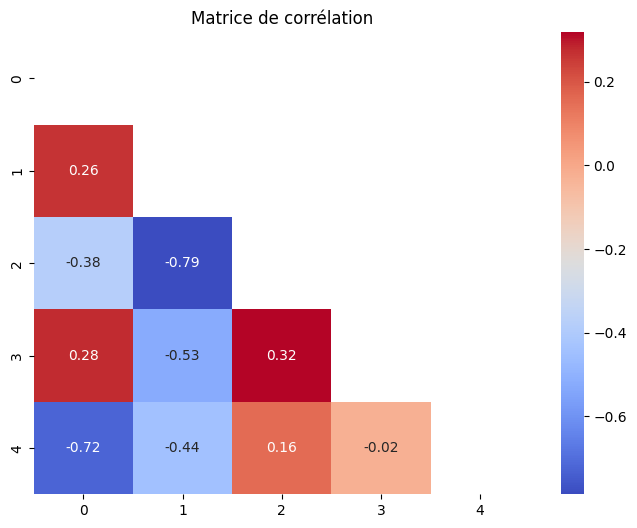

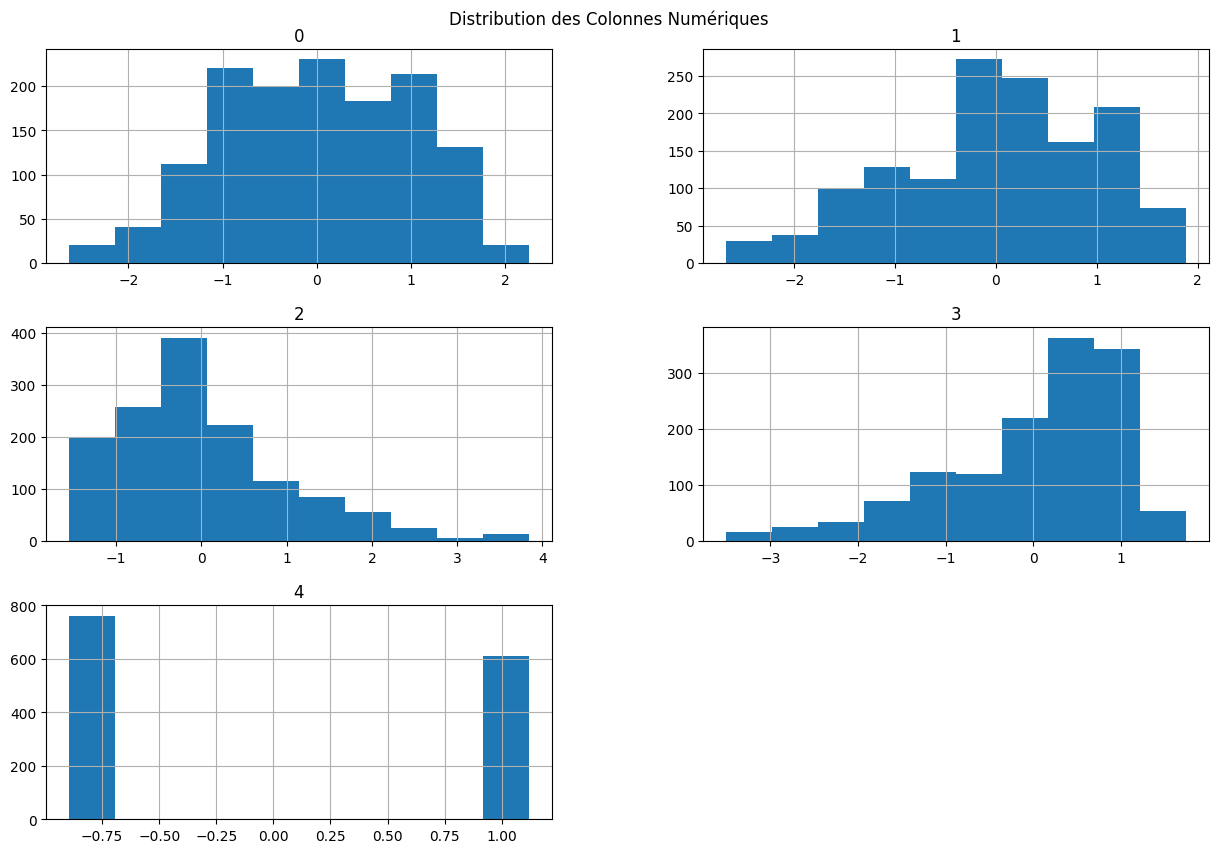

In [26]:
visualize_data(dataB, targetB)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = Workflow.split_data(dataB, targetB)

In [26]:
best_reg1 = Workflow.train_and_tune_model(X_train1, y_train1, dict_models['Logistic Regression']['model'], dict_models['Logistic Regression']['param_grid'],  cv, scoring='f1', verbose=1, return_full_search=False)

Starting Grid Search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Grid Search Complete!

Best Parameters Found:
{'C': 0.001, 'fit_intercept': False, 'intercept_scaling': 1}
Best f1 Score: 1.0000


In [27]:
best_Knn1 = Workflow.train_and_tune_model(X_train1, y_train1, dict_models['KNeighborsClassifier']['model'], dict_models['KNeighborsClassifier']['param_grid'],  cv, scoring='f1', verbose=1, return_full_search=False)

Starting Grid Search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Grid Search Complete!

Best Parameters Found:
{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best f1 Score: 1.0000


In [28]:
best_rf1 = Workflow.train_and_tune_model(X_train1, y_train1, dict_models['RandomForestClassifier']['model'], dict_models['RandomForestClassifier']['param_grid'],  cv, scoring='f1', verbose=1, return_full_search=False)

Starting Grid Search...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Grid Search Complete!

Best Parameters Found:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}
Best f1 Score: 1.0000


In [29]:
best_nn1  = Workflow.train_and_tune_model(X_train1, y_train1, dict_models['MLPClassifier']['model'], dict_models['MLPClassifier']['param_grid'],  cv, scoring='f1', verbose=1, return_full_search=False)

Starting Grid Search...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Grid Search Complete!

Best Parameters Found:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Best f1 Score: 1.0000


In [30]:
best_tree1 = Workflow.train_and_tune_model(X_train1, y_train1, dict_models['DecisionTreeClassifier']['model'], dict_models['DecisionTreeClassifier']['param_grid'],  cv, scoring='f1', verbose=1, return_full_search=False)

Starting Grid Search...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Grid Search Complete!

Best Parameters Found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best f1 Score: 1.0000


Évaluation des modèles:   0%|          | 0/5 [00:00<?, ?it/s]

Starting Grid Search...
Grid Search Complete!

Best Parameters Found:
{'C': 0.001, 'fit_intercept': False, 'intercept_scaling': 1}
Best f1 Score: 1.0000


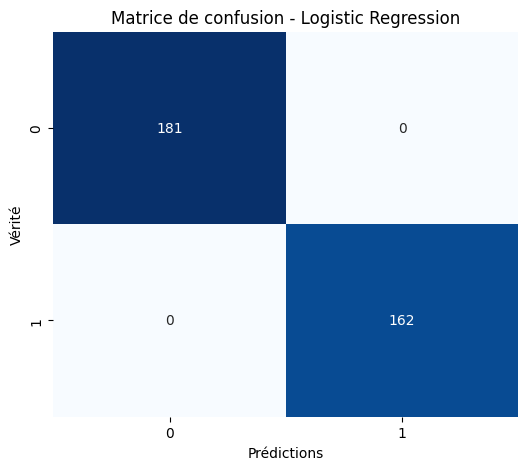

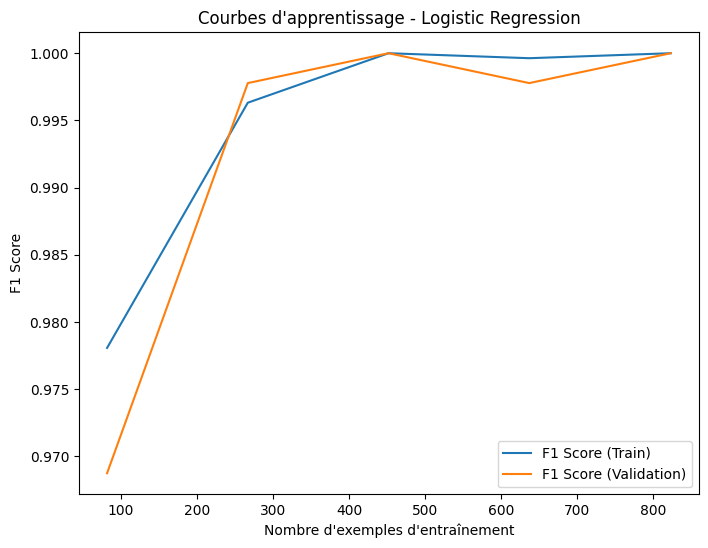

Évaluation des modèles:  20%|██        | 1/5 [00:00<00:01,  2.08it/s]

Starting Grid Search...
Grid Search Complete!

Best Parameters Found:
{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best f1 Score: 1.0000


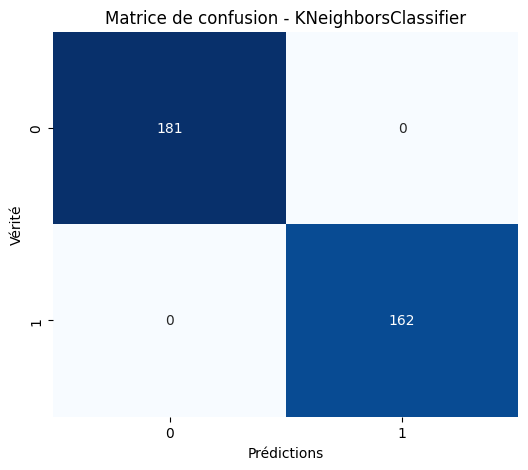

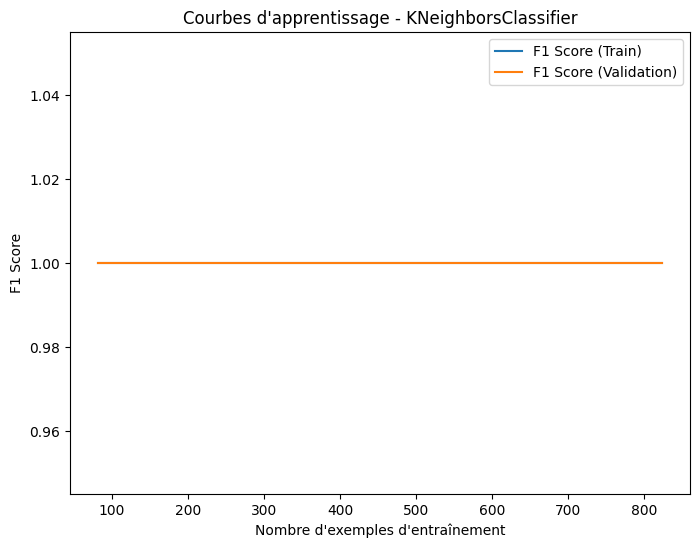

Évaluation des modèles:  40%|████      | 2/5 [00:01<00:01,  1.74it/s]

Starting Grid Search...
Grid Search Complete!

Best Parameters Found:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}
Best f1 Score: 1.0000


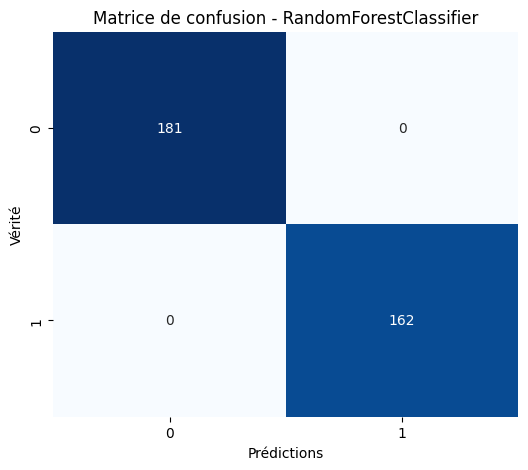

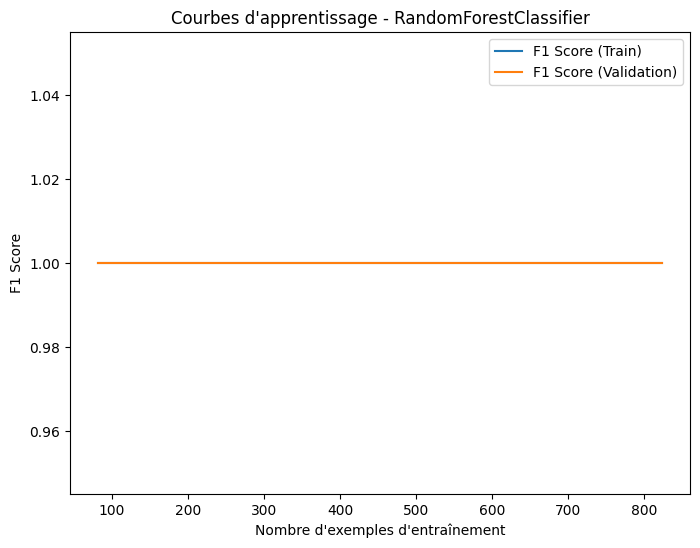

Évaluation des modèles:  60%|██████    | 3/5 [00:08<00:07,  3.80s/it]

Starting Grid Search...
Grid Search Complete!

Best Parameters Found:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Best f1 Score: 1.0000


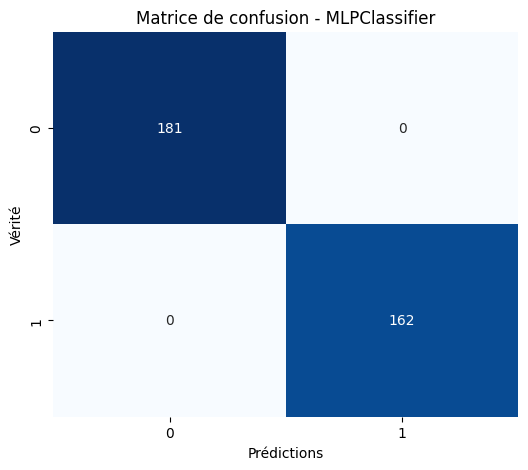

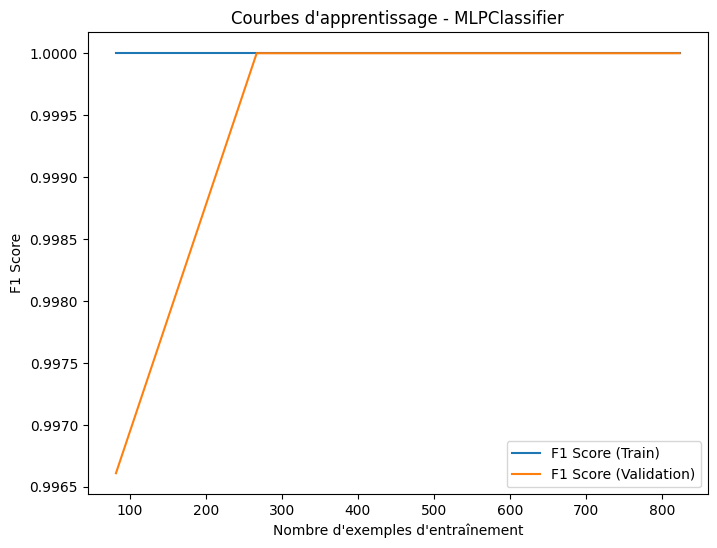

Évaluation des modèles:  80%|████████  | 4/5 [05:04<01:58, 118.95s/it]

Starting Grid Search...
Grid Search Complete!

Best Parameters Found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best f1 Score: 1.0000


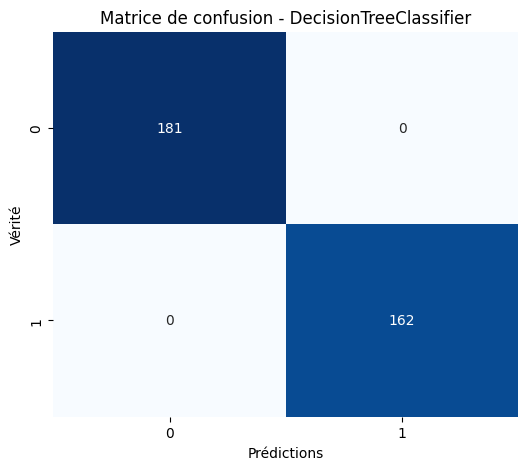

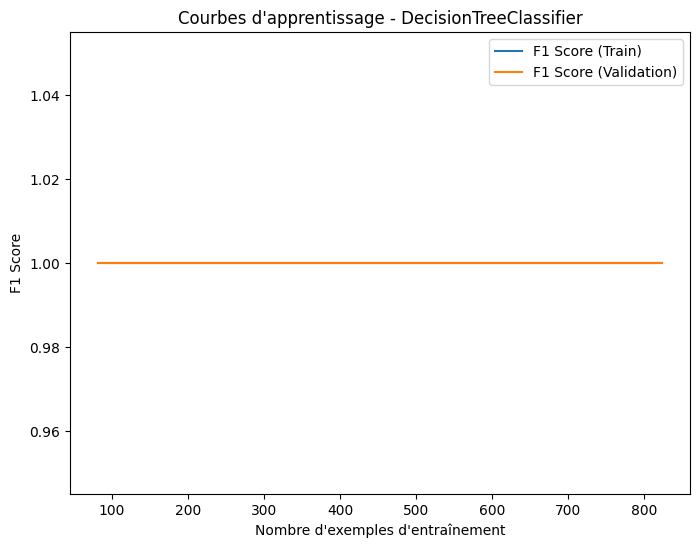

Évaluation des modèles: 100%|██████████| 5/5 [05:04<00:00, 60.95s/it] 


In [31]:
Workflow.display_results(dict_models, X_train1, y_train1, X_test1, y_test1, cv, disp_col="F1 Score")

In [32]:
best_models1 = {
    'Logistic Regression': {
    'model': best_reg1,
    },
    'KNeighborsClassifier': {
        'model': best_Knn1
    },
    'RandomForestClassifier': {
        'model': best_rf1
    },
    'MLPClassifier': {
        'model': best_nn1
    },
    'DecisionTreeClassifier': {
        'model': best_tree1
    }
}

In [33]:
results1 = []
for model_name, model in best_models1.items():
    f1 = Workflow.test_model(X_test1, y_test1, model['model'])
    results1.append({
        'model': model_name,
        'f1': f1
    })

In [34]:
print(results1)

[{'model': 'Logistic Regression', 'f1': 1.0}, {'model': 'KNeighborsClassifier', 'f1': 1.0}, {'model': 'RandomForestClassifier', 'f1': 1.0}, {'model': 'MLPClassifier', 'f1': 1.0}, {'model': 'DecisionTreeClassifier', 'f1': 1.0}]


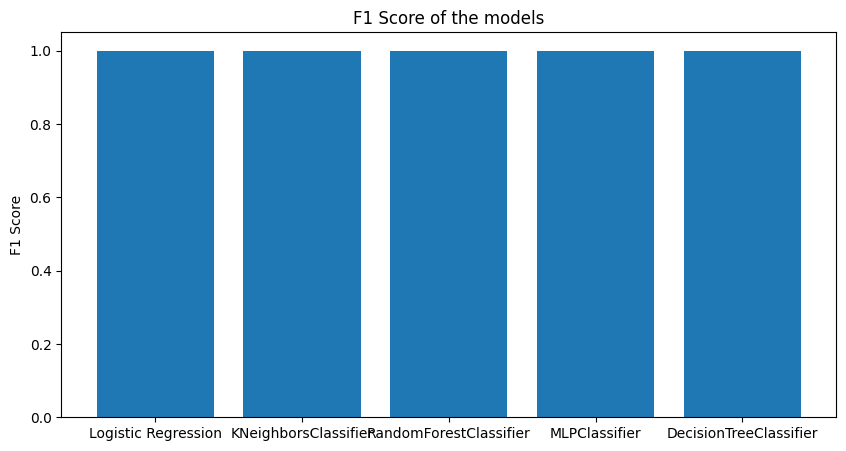

In [35]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar([x['model'] for x in results1], [x['f1'] for x in results1])
plt.ylabel('F1 Score')
plt.title('F1 Score of the models')
plt.show()


Commentary on the outputs:

After training all the models we can see that we have achieved the best results. However, in  plotting the evolution of the F1 for some models score we can elucidate a constant pattern that it is due to running the training procedure for more than two times and achieving the best results within 100 training examples. While, for the other models that need more training examples we can obviosly see the ascendant evolution of the F1 score.